In [1]:
import logging, gensim, bz2
from gensim import corpora, models, similarities, matutils
from collections import defaultdict
import nltk
import pyLDAvis.gensim
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
import os
import codecs
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

# Let's retrieve the documents. A document is a set of tweets of a user

In [2]:
setDocs1 = []
allDocuments = []
for file_name in os.listdir("/home/vagrant/shared/Test/1"):
    file = codecs.open("/home/vagrant/shared/Test/1/" + file_name, "r", "utf-8")
    aux = file.read()
    setDocs1.append(aux)
    allDocuments.append(aux)

In [3]:
setDocs2 = []
for file_name in os.listdir("/home/vagrant/shared/Test/2"):
    file = codecs.open("/home/vagrant/shared/Test/2/" + file_name, "r", "utf-8")
    aux = file.read()
    setDocs2.append(aux)
    allDocuments.append(aux)

# Preprocessing

In [4]:
texts = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in allDocuments for w in doc if len(w)==1]
bigrams  = [ w for doc in allDocuments for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in allDocuments:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)

In [5]:
texts1 = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in setDocs1 for w in doc if len(w)==1]
bigrams  = [ w for doc in setDocs1 for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in setDocs1:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts1.append(stemmed_tokens)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts1]

In [6]:
#for i in xrange(len(corpus)):
#    for w in corpus[1]:
#        print dictionary[w[1]]

# LDA Model

In [21]:
lda_model_1 = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=10, alpha=0.001)

In [22]:
for i in xrange(3):
    print i
    for tup in lda_model_1.get_topic_terms(i):
        print dictionary[tup[0]] + ' ' + str(tup[1])

0
obama 0.0172359683059
act 0.00936873288454
state 0.00825460657575
american 0.00824179037957
presid 0.00824140046271
law 0.00712171145464
democrat 0.00599748916503
unit 0.0059959347112
2011 0.0048808909256
born 0.00487812678554
1
alonso 0.028583564472
prix 0.0112242353044
grand 0.0112122050969
ferrari 0.0101332217643
start 0.0101260205697
season 0.00904522350116
driver 0.00904480031433
finish 0.00795964520447
vettel 0.00687672089884
2010 0.00687656119667
2
axiom 0.0186357013387
gödel 0.0186280182815
set 0.0140665309416
system 0.0106419759341
theori 0.00950643678772
logic 0.00836451555249
consist 0.00836394211062
theorem 0.00836342281999
work 0.00723690830333
number 0.00722748872106


In [9]:
#data1 =  pyLDAvis.gensim.prepare(lda_model_1, corpus, dictionary)
#pyLDAvis.display(data1)

# Model 2

In [10]:
texts2 = []
tokenizer = RegexpTokenizer(r'\w+')
stoplist_tw=['amp','get','got','hey','hmm','hoo','hop','iep','let','ooo','par',
            'pdt','pln','pst','wha','yep','yer','aest','didn','nzdt','via',
            'one','com','new','like','great','make','top','awesome','best',
            'good','wow','yes','say','yay','would','thanks','thank','going',
            'new','use','should','could','best','really','see','want','nice',
            'while','know']

unigrams = [ w for doc in setDocs2 for w in doc if len(w)==1]
bigrams  = [ w for doc in setDocs2 for w in doc if len(w)==2]

en_stop  = set(nltk.corpus.stopwords.words("english") + stoplist_tw
                + unigrams + bigrams)
p_stemmer = PorterStemmer()
# loop through document list
for i in setDocs2:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts2.append(stemmed_tokens)
    
# convert tokenized documents into a document-term matrix
corpus2 = [dictionary.doc2bow(text) for text in texts2]

In [23]:
lda_model_2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=3, id2word = dictionary, passes=10, alpha=0.001)

In [24]:
for i in xrange(3):
    print i
    for tup in lda_model_2.get_topic_terms(i):
        print dictionary[tup[0]] + ' ' + str(tup[1])

0
state 0.0245719002916
unit 0.018258280037
world 0.0140603239296
war 0.00989132284371
countri 0.00877442177988
american 0.00877434212838
school 0.0066833181639
student 0.00562714397271
end 0.00562054168954
per 0.00561816355545
1
ture 0.0288569598697
comput 0.0211573753513
machin 0.0178759606912
univers 0.00692076410845
church 0.00583943381457
studi 0.00583645675398
first 0.00480534113064
mathemat 0.00475262499128
war 0.00474741820814
problem 0.00474370336146
2
xiaomi 0.0254290689968
smartphon 0.0160173069975
compani 0.0139407349331
sell 0.0076730364219
store 0.0076721902524
2014 0.00766877229022
first 0.00766560300804
announc 0.00662301580775
2013 0.00662062356545
phone 0.00661988986715


In [13]:
#data2 =  pyLDAvis.gensim.prepare(lda_model_2, corpus2, dictionary)
#pyLDAvis.display(data2)

# Compare models


# Compare topics using cosine similarity


In [14]:
def compute_similarity_two_topics(list_topic1, list_topic2):
    from collections import defaultdict
    from math import sqrt
    v_t0 = dict(list_topic1) #vector of the first topic
    dic = defaultdict(list)
    v_t1 = dict(list_topic2) #vector of the second topic
    norm_v_t0 = 0
    norm_v_t1 = 0
    for key in v_t0:  #multiply components of both vectors
        norm_v_t0 =  norm_v_t0 + (v_t0[key] *  v_t0[key]) #obtain the norm of the first vector
        if key in v_t1:
            dic[key] = v_t0[key] * v_t1[key]
    norm_v_t0 = sqrt(norm_v_t0) #last step to get the norm of the first vector

    for key in v_t1: #obtain the norm of the second vector
        norm_v_t1 =  norm_v_t1 + (v_t1[key] *  v_t1[key])
    norm_v_t1 = sqrt(norm_v_t1)

    similarity = 0
    for key in dic:
        similarity = similarity + dic[key]/(norm_v_t0 * norm_v_t1)
    return similarity

In [31]:
def compare_models(model1, model2, threshold):
    for i in xrange(3):
        for j in xrange(3):
            max_similarity = 0
            equivalent_topic_in_model_b = 0
            for j in xrange(model2.num_topics):
                similarity = compute_similarity_two_topics(model1.get_topic_terms(i), model2.get_topic_terms(j))
                if max_similarity < similarity:
                    max_similarity = similarity
                    equivalent_topic_in_model_b = j
        if max_similarity >= threshold:
            print str(i) + ' ' + str(equivalent_topic_in_model_b) + ' ' + str(similarity)
            print 'Model 1' 
            for tup in model1.get_topic_terms(i):
                print dictionary[tup[0]] + ' ' + str(tup[1])
            print 'Model 2' 
            for tup in model2.get_topic_terms(equivalent_topic_in_model_b):
                print dictionary[tup[0]] + ' ' + str(tup[1])

In [28]:
#Uses weighted arithmetic mean. Show a word clound with the similar topics found
#alpha: weight given to similarities between topics greater than threshold
#beta: weight given to similarities between topics lower than threshold
def compare_models_and_viz(model1, model2, threshold, alpha, beta):
    model1_topics = []
    for i in xrange(model1.num_topics):
        #print i
        words = []
        for tup in model1.get_topic_terms(i):
            t = ( dictionary[tup[0]],tup[1])
            words.append(t)
            #print dictionary[tup[0]] + ' ' + str(tup[1])
        model1_topics.append(words)
    
    model2_topics = []
    for i in xrange(model2.num_topics):
        #print i
        words = []
        for tup in model2.get_topic_terms(i):
            t = ( dictionary[tup[0]],tup[1])
            words.append(t)
            #print dictionary[tup[0]] + ' ' + str(tup[1])
        model2_topics.append(words)
    
    
    sim = []
    numerator = 0
    denominator = 0
    for i in xrange(model1.num_topics):
        max_similarity = 0
        equivalent_topic_in_model_b = 0
        for j in xrange(model2.num_topics):
            similarity = compute_similarity_two_topics(model1.get_topic_terms(i), model2.get_topic_terms(j))
            if max_similarity < similarity:
                max_similarity = similarity
                equivalent_topic_in_model_b = j
        if max_similarity >= threshold:
            numerator = numerator + alpha * max_similarity
            denominator = denominator + alpha
            sim.append(max_similarity)
            print str(i) + ' ' + str(equivalent_topic_in_model_b) + ' ' + str(max_similarity)
            wordcloud = WordCloud(width=800, height=600, relative_scaling=.8)\
                .generate_from_frequencies(model1_topics[i])
            plt.imshow(wordcloud)
            plt.axis("off")
            plt.show()
            wordcloud = WordCloud(width=800, height=600, relative_scaling=.8)\
                .generate_from_frequencies(model2_topics[equivalent_topic_in_model_b])
            plt.imshow(wordcloud)
            plt.axis("off")
            plt.show()
            #print 'Model 1' 
            #for tup in model1.get_topic_terms(i):
            #    print dictionary[tup[0]] + ' ' + str(tup[1])
            #print 'Model 2' 
            #for tup in model2.get_topic_terms(j):
            #    print dictionary[tup[0]] + ' ' + str(tup[1])
        else:
            numerator = numerator + beta * max_similarity
            denominator = denominator + beta
    return numerator/denominator

0 0 0.357346551058


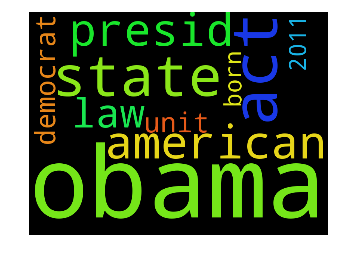

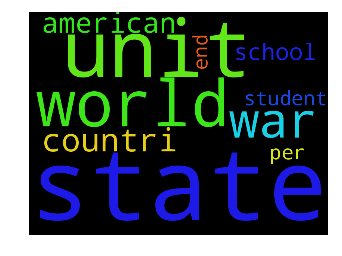

0.35734655105752972

In [29]:
compare_models_and_viz(lda_model_1, lda_model_2, 0.1, 1, 0)

In [32]:
compare_models(lda_model_1, lda_model_2, 0.1)

0 0 0
Model 1
obama 0.0172359683059
act 0.00936873288454
state 0.00825460657575
american 0.00824179037957
presid 0.00824140046271
law 0.00712171145464
democrat 0.00599748916503
unit 0.0059959347112
2011 0.0048808909256
born 0.00487812678554
Model 2
state 0.0245719002916
unit 0.018258280037
world 0.0140603239296
war 0.00989132284371
countri 0.00877442177988
american 0.00877434212838
school 0.0066833181639
student 0.00562714397271
end 0.00562054168954
per 0.00561816355545
